In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
sys.path.append("../")

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms


from toy_networks.dendrite_linear_mnist import ToyNetwork

from nupic.research.frameworks.continuous_learning.utils import (
    clear_labels,
    freeze_output_layer,
    train_model,
)
from nupic.research.frameworks.continuous_learning.dendrite_layers import (
    DendriteLayer,
)

from nupic.research.frameworks.continuous_learning.mnist_data_utils import combine_classes, mnist_classwise_loader
from nupic.research.frameworks.pytorch.model_utils import evaluate_model

from nupic.torch.modules import (
    Flatten,
    KWinners,
    SparseWeights,
)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_loader, test_loader = mnist_classwise_loader(
    data_dir = "/Users/afisher/nta/mnist/"
)

In [9]:
data_dir = "/Users/afisher/nta/mnist/"

def train_sequential(model, optimizer=None, epochs=1, lr=0.01, combine_data=False, freeze_output=False):
    train_inds = np.arange(4).reshape(2,2)

    if combine_data:
        cats = (False, True)
    else:
        cats = (False, False)
    for j in range(len(train_inds)):
        loader = combine_classes(data_dir, train_inds[j])
        if optimizer is None:  # new optimizer for each bit
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.)
        for epoch in range(epochs):
            train_model(model, loader=loader, optimizer=optimizer, device=torch.device("cpu"),
                             freeze_output=freeze_output, combine_data=combine_data, #cats[j],
                             output_indices=clear_labels(train_inds[j], len(train_inds.flatten())),
                             layer_type="dendrite",
                            )
            test_acc = np.array(
            [np.round(evaluate_model(model, test_loader[k],
                                 device=torch.device("cpu"))["mean_accuracy"], 2) for k in train_inds.flatten()
            ] )
            print(test_acc)
            
    return test_acc

def hard_sigmoid(x):
    return 1 / (1 + torch.exp(-3*(x-1)))

In [12]:
net = ToyNetwork(dpc=10*(1,1,1,1), #1*(1,2,2,2),
                 linear_n=(200, 100, 20,),
                 dend_ws=2*(0.5, 0.1, 0.1, 0.1),
                 cat_ws=(0.1, 0.1, 0.1, 0.1),
                 num_classes=4,
                act_fun_type="kwinner")

optim = torch.optim.Adam(net.parameters(), lr=0.02, weight_decay=0.0,)

train_sequential(net, optimizer=optim, lr=0.001, epochs=1,
                 freeze_output=False,  combine_data=True)


[1. 1. 0. 0.]
[0.76 0.23 0.04 0.89]


array([0.76, 0.23, 0.04, 0.89])

In [14]:
net = ToyNetwork(dpc=2*(1,1,1,1), #1*(1,2,2,2),
                 linear_n=(100, 50, 20,),
                 dend_ws=2*(0.5, 0.1, 0.1, 0.1),
                 cat_ws=(0.1, 0.1, 0.1, 0.1),
                 num_classes=4,
                act_fun_type="kwinner")

optim = torch.optim.Adam(net.parameters(), lr=0.02, weight_decay=0.0,)

train_sequential(net, optimizer=optim, lr=0.001, epochs=1,
                 freeze_output=False,  combine_data=True)


[1. 1. 0. 0.]
[0.9  1.   0.06 0.76]


array([0.9 , 1.  , 0.06, 0.76])

In [17]:
net = ToyNetwork(dpc=1*(1,1,1,1), #1*(1,2,2,2),
                 linear_n=(50, 50, 20,),
                 dend_ws=2*(0.5, 0.1, 0.1, 0.1),
                 cat_ws=(0.1, 0.1, 0.1, 0.1),
                 num_classes=4,
                act_fun_type="kwinner")

optim = torch.optim.Adam(net.parameters(), lr=0.02, weight_decay=0.0,)

train_sequential(net, optimizer=optim, lr=0.001, epochs=1,
                 freeze_output=False,  combine_data=True)


[1. 1. 0. 0.]
[0.   0.   0.73 0.62]


array([0.  , 0.  , 0.73, 0.62])

In [19]:
net = ToyNetwork(dpc=2*(1,1,1,1), #1*(1,2,2,2),
                 linear_n=(50, 50, 20,),
                 dend_ws=2*(0.1, 0.1, 0.1, 0.1),
                 cat_ws=(0.1, 0.1, 0.1, 0.1),
                 num_classes=4,
                act_fun_type="kwinner")

optim = torch.optim.Adam(net.parameters(), lr=0.02, weight_decay=0.0,)

train_sequential(net, optimizer=optim, lr=0.001, epochs=1,
                 freeze_output=False,  combine_data=True)


[1. 1. 0. 0.]
[0.9  0.   0.79 0.05]


array([0.9 , 0.  , 0.79, 0.05])

In [159]:
net = ToyNetwork(dpc=2*(1,1,1,1), #1*(1,2,2,2),
                 linear_n=(100, 50, 20,),
                 dend_ws=2*(0.25, 0.1, 0.1, 0.1),
                 cat_ws=(0.1, 0.1, 0.1, 0.1),
                 num_classes=4,
                act_fun_type="kwinner")

optim = torch.optim.Adam(net.parameters(), lr=0.02, weight_decay=0.0,)

train_sequential(net, optimizer=optim, lr=0.001, epochs=1,
                 freeze_output=False,  combine_data=True)


[1. 1. 0. 0.]
[0.91 0.   0.7  0.04]


array([0.91, 0.  , 0.7 , 0.04])

In [26]:
net = ToyNetwork(dpc=2*(1,1,1,1), #1*(1,2,2,2),
                 linear_n=(100, 50, 20,),
                 dend_ws=2*(0.1, 0.1, 0.1, 0.1),
                 cat_ws=1*(0.1, 0.1, 0.1, 0.1),
                 num_classes=10,
                act_fun_type="sigmoid")

optim = torch.optim.SGD(net.parameters(), lr=0.04, weight_decay=0.0,)

train_sequential(net, optimizer=optim, lr=0.01, epochs=1,
                 freeze_output=True,  combine_data=True)


[0.  0.  0.7 0. ]
[0.   0.   0.62 0.32]


array([0.  , 0.  , 0.62, 0.32])

In [84]:
out0 = net.d1(net.flatten(x))

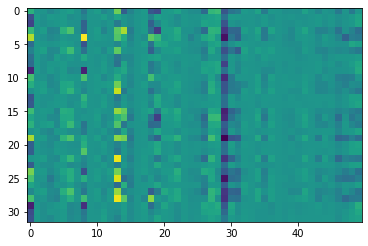

In [85]:
plt.imshow(out0.detach())

In [86]:
out1 = net.d1(net.flatten(x2))

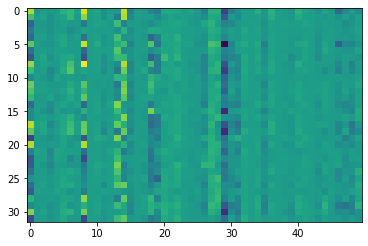

In [87]:
plt.imshow(out1.detach())

In [17]:
def get_act(model, loader):
    """ Gets network activations when presented with inputs for each class
    """

    layer_names = [p[0] for p in model.named_children()]

    act = {}

    def get_layer_act(name):
        def hook(model, input_, output):
            act[name] = output.detach().cpu().numpy()

        return hook

    cnt = 0
    for module in model.named_children():
        for submod in module[1].named_children():
            submod[1].register_forward_hook(get_layer_act(submod[0] + "_{}".format(module[0])))
            cnt += 1

    outputs = []
    x, y = next(iter(loader))
    model(x, y)
    outputs = act
    act = {}

    return outputs

In [21]:
act = get_act(net, loader)

In [19]:
loader = combine_classes(data_dir, [0,1])
x, y = next(iter(loader))

In [20]:
loader2 = combine_classes(data_dir, [2,3])
x2, y2 = next(iter(loader2))

In [139]:
act.keys()

dict_keys(['input_d1', 'output_d1', 'input_d2', 'output_d2', 'input_d3', 'output_d3', 'input_dend_output', 'output_dend_output'])

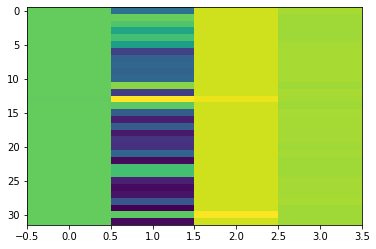

In [22]:
plt.imshow(act["input_dend_output"], aspect="auto")

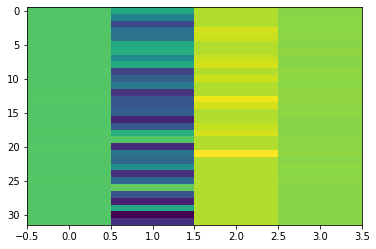

In [23]:
act2 = get_act(net, loader2)
plt.imshow(act2["input_dend_output"], aspect="auto")

In [198]:
def freeze_output_layer(model, indices, layer_type="dense", linear_number=2):
    """ Freeze output layer gradients of specific classes for classification.
    :param layer_type: can be "dense" (i.e. model.output) or "kwinner"
    :param linear_number: "linear" module number for k winner
    (e.g. linear1_kwinners, linear2_kwinners etc.)
    """
    print(layer_type)
    if layer_type == "dense":
        with torch.no_grad():
            [model.output.weight.grad.data[index, :].fill_(0.0) for index in indices]
            [model.output.bias.grad.data[index].fill_(0.0) for index in indices]

    elif layer_type == "kwinner":
        module_dict = {k[0]: k[1] for k in model.named_parameters()}
        with torch.no_grad():
            [
                module_dict["linear{}.module.weight".format(linear_number)]
                .grad.data[index, :]
                .fill_(0.0)
                for index in indices
            ]
            [
                module_dict["linear{}.module.bias".format(linear_number)]
                .grad.data[index]
                .fill_(0.0)
                for index in indices
            ]
            
    elif layer_type == "dendrite":
        with torch.no_grad():
            [model.dend_output.output.weight.grad.data[index, :].fill_(0.0) for index in indices]
            [model.dend_output.output.bias.grad.data[index].fill_(0.0) for index in indices] 

    else:
        raise AssertionError("layer_type must be ''dense'' or ''kwinner''")

In [184]:
net.dend_output.output.weight.grad

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0100,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0160]])

In [188]:
def train_sequential(model, optimizer=None, 
                     epochs=1, lr=0.01, num_tasks=2,
                     combine_data=False, freeze_output=False):
    
#     train_inds = np.arange(1, 2*num_tasks+1).reshape(num_tasks,2)
    train_inds = np.arange(4).reshape(2,2)

    if combine_data:
        cats = (False, True)
    else:
        cats = (False, False)
        
    for j in range(len(train_inds)):
        loader = combine_classes(data_dir, train_inds[j])
        if optimizer is None:  # new optimizer for each bit
            optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.)
        for epoch in range(epochs):
            train_model(model, loader=loader, optimizer=optimizer, device=torch.device("cpu"),
                             freeze_output=freeze_output, combine_data=combine_data, #cats[j],
                             output_indices=clear_labels(train_inds[j],
                                                         len(train_inds.flatten())
                                                        ),
                             layer_type="dendrite", linear_number='',
                            )
            test_acc = np.array(
            [np.round(evaluate_model(model, test_loader[k],
                                 device=torch.device("cpu"))["mean_accuracy"], 2) for k in train_inds.flatten()
            ] )
            print(test_acc)
            
    return test_acc